In [53]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




In [71]:
df = pd.read_csv(r"c:\Users\pakistan\Downloads\chicago_taxi_train.csv")
print(df.head())
df.describe()
df.shape

    TRIP_START_TIMESTAMP     TRIP_END_TIMESTAMP  TRIP_START_HOUR  \
0  05/17/2022 7:15:00 AM  05/17/2022 7:45:00 AM             7.25   
1  05/17/2022 5:15:00 PM  05/17/2022 5:30:00 PM            17.25   
2  05/17/2022 5:15:00 PM  05/17/2022 5:30:00 PM            17.25   
3  05/17/2022 6:00:00 PM  05/17/2022 7:00:00 PM            18.00   
4  05/17/2022 5:00:00 PM  05/17/2022 5:30:00 PM            17.00   

   TRIP_SECONDS  TRIP_MILES  TRIP_SPEED  PICKUP_CENSUS_TRACT  \
0          2341        2.57         4.0                  NaN   
1          1074        1.18         4.0                  NaN   
2          1173        1.29         4.0         1.703132e+10   
3          3360        3.70         4.0         1.703132e+10   
4          1044        1.15         4.0         1.703132e+10   

   DROPOFF_CENSUS_TRACT  PICKUP_COMMUNITY_AREA  DROPOFF_COMMUNITY_AREA   FARE  \
0                   NaN                    NaN                    17.0  31.99   
1          1.703108e+10                    N

(31694, 18)

This is the data of the chicago city train containing 31694 rows, and 18 columns. a really large dataset. we can the first five rows of the data above.

To clean this large data we'll pick specific columns that will significantly influence the models'prediction.

In [55]:
training_df = df.loc[:, ("TRIP_MILES", "TRIP_SECONDS", "PAYMENT_TYPE", "COMPANY", "TIP_RATE", "FARE")]
print("Total number of rows: {0}\n\n".format(len(training_df.index)))
print(training_df.head(200))

Total number of rows: 31694


     TRIP_MILES  TRIP_SECONDS PAYMENT_TYPE                       COMPANY  \
0          2.57          2341       Mobile                     Flash Cab   
1          1.18          1074  Credit Card                     Flash Cab   
2          1.29          1173         Cash                      Sun Taxi   
3          3.70          3360         Cash       Choice Taxi Association   
4          1.15          1044         Cash                     Flash Cab   
..          ...           ...          ...                           ...   
195        1.13           821       Mobile  Blue Ribbon Taxi Association   
196        0.57           414         Cash                     Flash Cab   
197        1.22           886         Cash                  City Service   
198        1.68          1219       Mobile                      Sun Taxi   
199        0.71           515  Credit Card                      Sun Taxi   

     TIP_RATE   FARE  
0         6.3  31.99  
1        27

In [56]:
print('Total number of rows: {0} \n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 31694 




,TRIP_MILES,TRIP_SECONDS,PAYMENT_TYPE,COMPANY,TIP_RATE,FARE
count,31694.000000,31694.000000,31694,31694,31694.000000,31694.000000
unique,NaN,NaN,7,31,NaN,NaN
top,NaN,NaN,Credit Card,Flash Cab,NaN,NaN
freq,NaN,NaN,14142,7887,NaN,NaN
mean,8.289463,1319.796397,NaN,NaN,12.965785,23.905210
std,7.265672,928.932873,NaN,NaN,15.517765,16.970022
min,0.500000,60.000000,NaN,NaN,0.000000,3.250000
25%,1.720000,548.000000,NaN,NaN,0.000000,9.000000
50%,5.920000,1081.000000,NaN,NaN,12.200000,18.750000
75%,14.500000,1888.000000,NaN,NaN,20.800000,38.750000


To have a better understanding on this dataset, We need a total Description of the dataset by EDA to tell the
- Maximum Fare
- Mean distance across all trips
- Number of cab companies
- Payment type
- Missing values

In [57]:
max_fare = training_df['FARE'].max()
print("what is the maximum fare?        Answer: ${fare:.2f}".format(fare = max_fare))

mean_distance = training_df['TRIP_MILES'].mean()
print("what is the mean distance?       Answer: {mean:.4f} miles". format(mean =mean_distance))

unique_cab_company = training_df['COMPANY'].nunique()
print("How many cab companies are in the dataset? Answer:{number}".format(number = unique_cab_company))

payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print("what payment type was mostly used?       Answer:", payment_type)

miss_val = training_df.isnull().sum().sum()
print("Are any features missing data?    Answer:", "No" if miss_val == 0 else "yes")



what is the maximum fare?        Answer: $159.25
what is the mean distance?       Answer: 8.2895 miles
How many cab companies are in the dataset? Answer:31
what payment type was mostly used?       Answer: Credit Card
Are any features missing data?    Answer: No


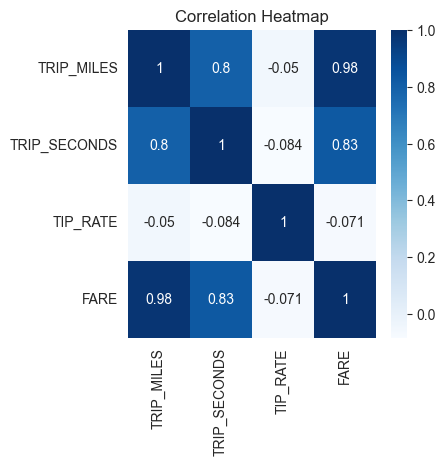

In [58]:
corr_matrix = training_df.corr(numeric_only=True)

plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix, annot=True, cmap = 'Blues')
plt.title('Correlation Heatmap')
plt.show()

from the diagram above we can clearly see that feature with the strongest correlation to the FARE is TRIP_MILES while the weakest correlation to the FARE is TIP_RATE

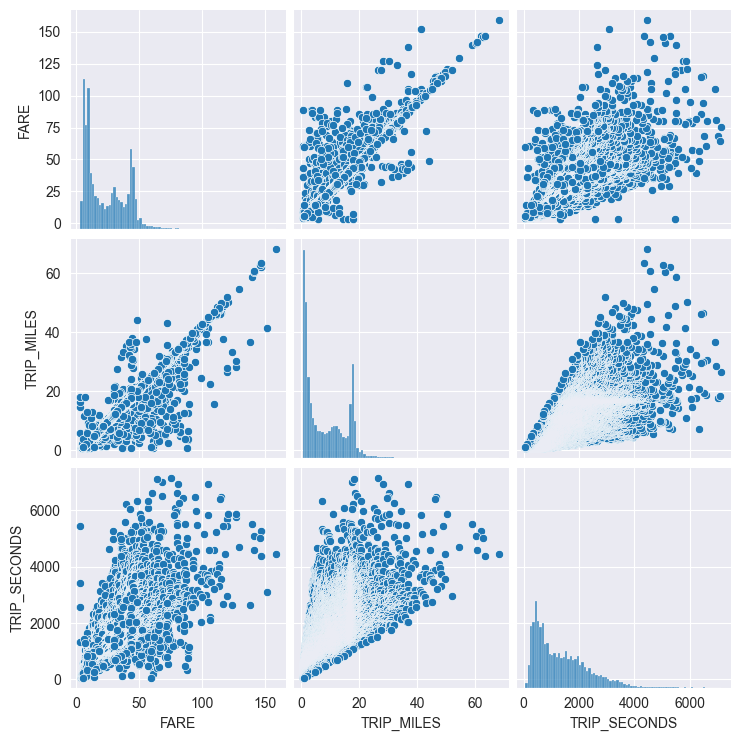

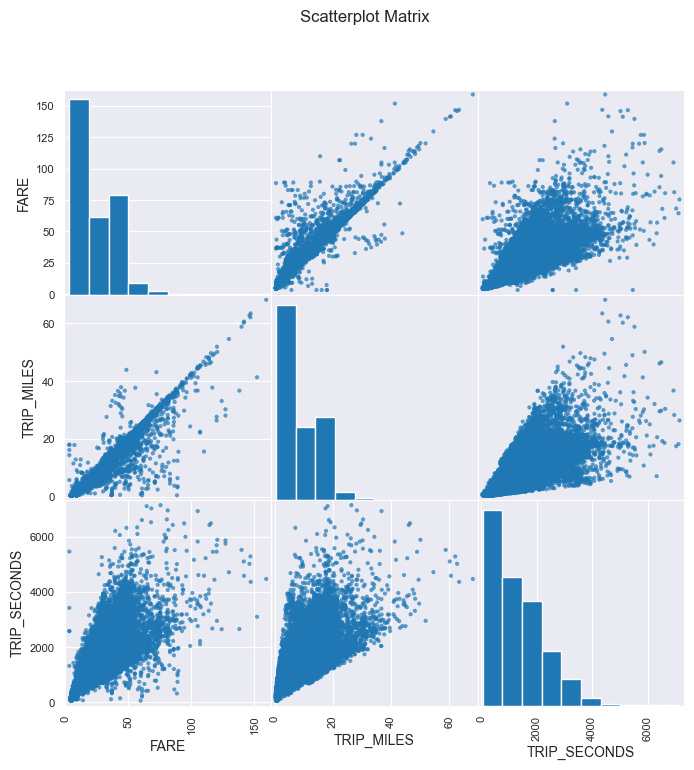

In [59]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.pairplot(training_df[["FARE", "TRIP_MILES", "TRIP_SECONDS"]], diag_kind='hist')
plt.show()


from pandas.plotting import scatter_matrix

scatter_matrix(training_df[["FARE", "TRIP_MILES", "TRIP_SECONDS"]],
               figsize=(8, 8), diagonal='hist', alpha=0.7)
plt.suptitle("Scatterplot Matrix")
plt.show()


I will use the seaborn chart to explain:

Diagonal :
FARE - The top left diagonal is a right-skewed distribution which indicate many low fares around 25 and very rare fares which are the long tails (Outliers). This means most taxi ride are cheap and expensive are rare.

TRIP_MILES - The middle diagonal is also a strong right skewed distribution showing that taxi rides are mostly short distance and few long trips.

TRIP_SECONDS - This is right - skewed with long tails up to 6,000 seconds. the reason for this unusual time is due to traffic, detours, waiting and other factors that could delay movements.

OFF - DIAGONAL :
TRIP_MILES VS FARE: This clearly shows that as miles increase the fees increase telling us that fares depends on the distance travelled.

TRIP_SECONDS VS TRIP_MILES: The time spent on distance varies from what is expected because of external factors that adds noise introducing variance into the model.

TRIP_SECONDS vs FARE : The higher the time the higher the fares, noisy relationship because not every trip timing was relative to the fares.Outliers are visible.

The summary of this chart is that the diagonal represent the distribution of data, off-diagonal is the relationship where Miles-Fare is strong, Time-Fare is moderate bit noisy, Outliers exist, and this data is model-ready with preprocessing.

In [61]:
feature_1 = ["TRIP_MILES"]
feature_2 = ["TRIP_MILES", "TRIP_SECONDS"]
target = "FARE"

training_df = training_df.dropna()

train_df, test_df =train_test_split(training_df, test_size=0.2, random_state=42)

print("Train size:", len(train_df))
print("Test size:", len(test_df))

Train size: 25355
Test size: 6339


In [64]:
def build_model(learning_rate=0.01, input_dim = 1):
    model = keras.Sequential([
       keras.Input(shape=(input_dim,)),
       keras.layers.Dense(units=1)


    ])

    model.compile(
        optimizer = keras.optimizers.Adam(learning_rate = learning_rate),
        loss = 'mse',
        metrics = ['mae']
    )
    return model

def train_model(model, X_train, y_train, epochs = 50, batch_size = 32):
    history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)
    return history

In [73]:
scaler = StandardScaler()

X_train_1 = scaler.fit_transform(train_df[feature_1])
X_test_1 = scaler.transform(test_df[feature_1])

y_train = train_df[target]
y_test = test_df[target]

model_1 = build_model(learning_rate = 0.01, input_dim = 1)
history_1 = train_model(model_1, X_train_1, y_train, epochs = 100)

loss_1, mae_1 = model_1.evaluate(X_test_1, y_test, verbose = 0)
print(f"One Feature Model - MAE:,{ mae_1:.5f}")



One Feature Model - MAE:,1.57763


I first trained the model using only TRIP_MILES to predict fare since distance had the strongest correlation.

The MAE was around $1.57763, meaning the model is off by about $1.5 on average per trip.

It shows distance alone explains most of the fare since we are using one feature.

In [74]:
learning_rates = [0.1, 0.01, 0.001]

for lr in learning_rates:
    model = build_model(learning_rate=lr, input_dim = 1)
    history = train_model(model, X_train_1, y_train, epochs = 100)
    loss, mae = model.evaluate(X_test_1, y_test, verbose=0)
    print(f"Learning Rate: {lr} | MAE: {mae}")



Learning Rate: 0.1 | MAE: 1.5952632427215576
Learning Rate: 0.01 | MAE: 1.5687894821166992
Learning Rate: 0.001 | MAE: 1.5795199871063232


From the results above, we see 0.01 is the best convergence because it gives the lowest MAE (optimal learning rate among the tested values).

So:

0.1 was slightly too aggressive

0.001 was slower

0.01 converged smoothly

This shows tuning hyperparameters actually matters.

In [ ]:
scaler2 = StandardScaler()

X_train_2 = scaler2.fit_transform(train_df[feature_2])
X_test_2 = scaler2.transform(test_df[feature_2])

model_2 =build_model(learning_rate = 0.01, input_dim = 2)
history_2 = train_model(model_2, X_train_2, y_train, epochs = 100)

loss_2, mae_2 = model_2.evaluate(X_test_2, y_test, verbose = 0)
print(f"Two Feature Model - MAE:, {mae_2:.5f}")


print(f"One feature MAE:, {mae_1:.5f}")
print(f"Two Feature MAE:, {mae_2:.5f}")

Next, I added TRIP_SECONDS to see if time improves predictions.

The MAE reduced to 1.16 meaning adding time made a noticeable improvement.

which makes sense because distance already explains most of the fare but time adds extra information.

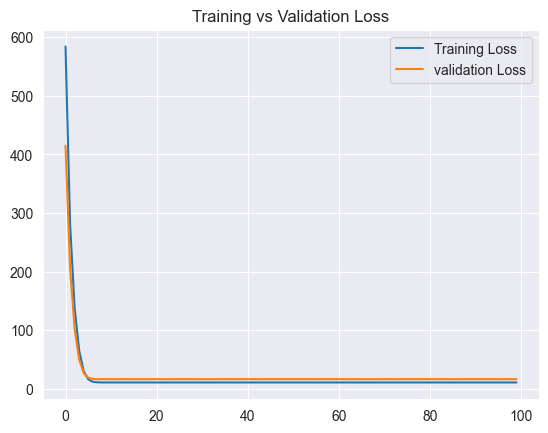

In [78]:
plt.plot(history_2.history["loss"], label = "Training Loss")
plt.plot(history_2.history["val_loss"], label="validation Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

The Training vs Validation loss plot shows the model converged fast meaning the model learned the relation between the feature and fare quickly, and I notice that the validation loss and the training loss were moving together meaning no obvious overfitting.so the model is stable

In [79]:
predictions = model_2.predict(X_test_2)

for i in range(5):
    print("Actual:", y_test.iloc[i], "predicted:", predictions[i][0])

199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Actual: 14.84 predicted: 15.671645
Actual: 4.75 predicted: 5.3190746
Actual: 33.5 predicted: 33.276894
Actual: 23.0 predicted: 23.379608
Actual: 9.68 predicted: 9.581441


I observe that predicted values are close to actual values with small errors.

using the first example: Error = |15.67-14.84| = 0.83 which is low.


TRIP_MILES is the strongest predictor of taxi fare.
Adding TRIP_SECONDS helps improve the model better.
Best learning rate is 0.01.

Overall, the model performs well and generalizes properly.